In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_path = '../data/processed/cleaned_music_population.csv'
df = pd.read_csv(df_path)

In [3]:
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [4]:
df.describe()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,44.263327,0.306596,0.558532,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,15.553972,0.341391,0.178858,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,0.000000,0.000000,0.059600,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020100,0.442000,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,45.000000,0.145000,0.568000,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,56.000000,0.551000,0.687000,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,99.000000,0.996000,0.986000,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [5]:
# See distribution of genres
df_genres = df['music_genre'].value_counts()

In [6]:
df_genres

Rock           4561
Jazz           4521
Hip-Hop        4520
Rap            4504
Classical      4500
Anime          4497
Alternative    4495
Country        4486
Blues          4470
Electronic     4466
Name: music_genre, dtype: int64

Vemos que los generos musicales tienen una distribucion uniforme

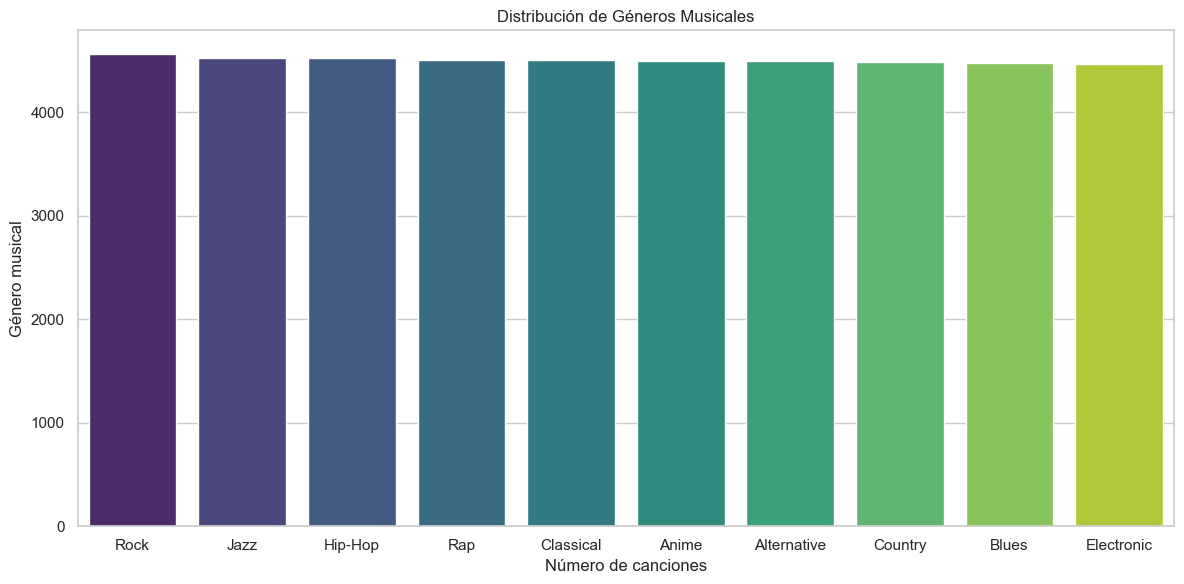

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.barplot(x=df_genres.index, y=df_genres.values, palette="viridis")
plt.title("Distribución de Géneros Musicales")
plt.xlabel("Número de canciones")
plt.ylabel("Género musical")
plt.tight_layout()
plt.show()

In [8]:
numeric_df = df.select_dtypes(include='float64')
numeric_df.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,27.0,0.00468,0.652,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759
1,31.0,0.01270,0.622,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531
2,28.0,0.00306,0.620,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333
3,34.0,0.02540,0.774,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270
4,32.0,0.00465,0.638,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323


Veamos las correlaciones entre las variables numericas

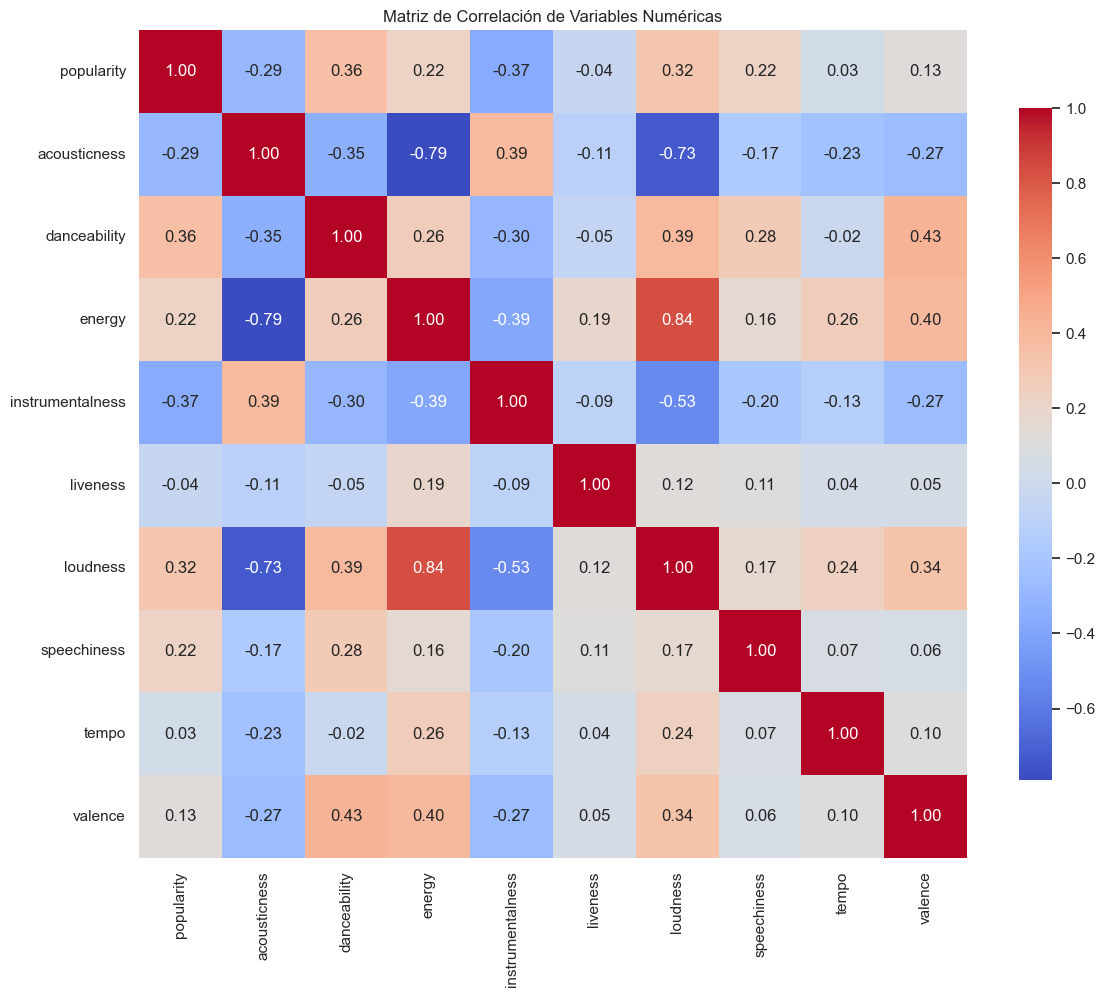

In [9]:
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación de Variables Numéricas")
plt.tight_layout()
plt.show()
plt.close('all')

Veamos la popularidad respecto a cada genero

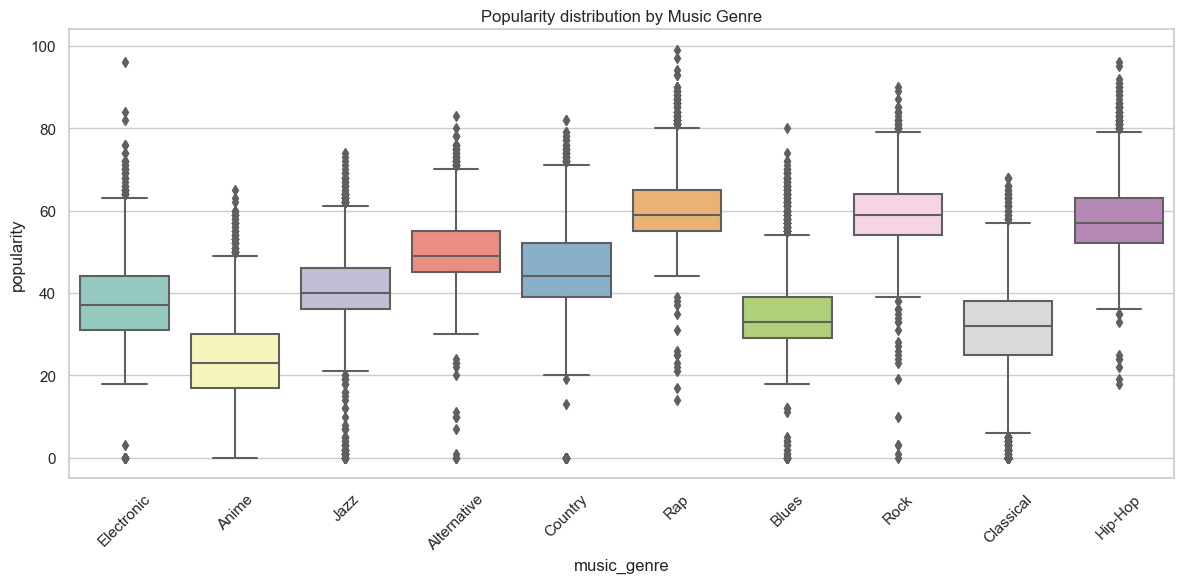

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="music_genre", y="popularity", palette="Set3")
plt.xticks(rotation=45)
plt.title("Popularity distribution by Music Genre")
plt.tight_layout()
plt.savefig("popularity_by_genre.png")
plt.show()

Veamos la distribucion de la popularidad, hacerlo con mapoltlib, pues sns hay problemas

Vemos que se parece a una distribucion normal, quizas hay unos valores atipicos al inicio

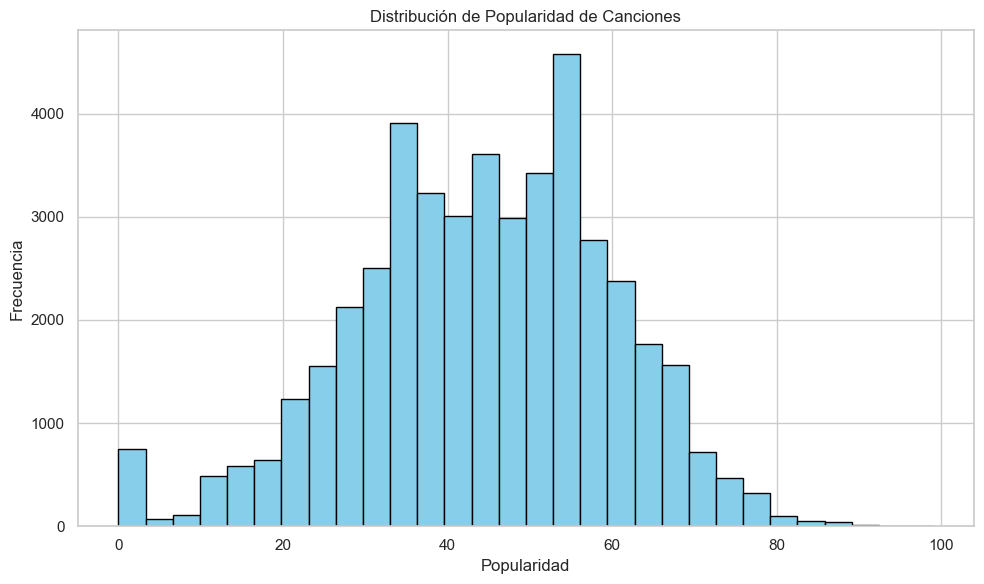

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=30, color='skyblue', edgecolor='black')

plt.title("Distribución de Popularidad de Canciones")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27be2704fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x27be27054e0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x27be1efbdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x27be2705a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x27be2705cc0>],
 'means': []}

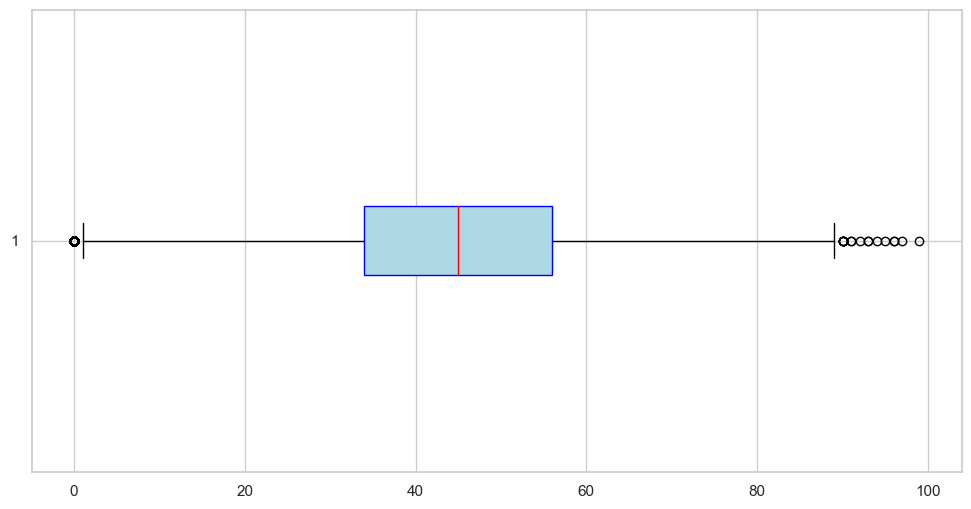

In [12]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['popularity'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))

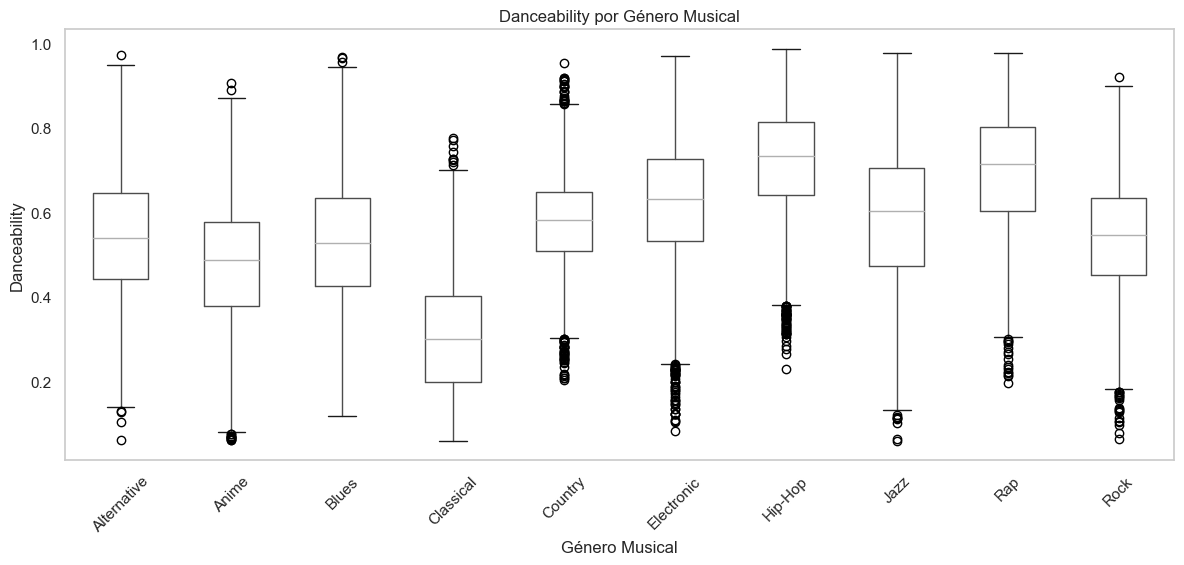

In [13]:
import matplotlib.pyplot as plt

df.boxplot(column='danceability', by='music_genre', figsize=(12, 6), grid=False, rot=45)
plt.title("Danceability por Género Musical")
plt.suptitle("")  # Quita el título automático
plt.xlabel("Género Musical")
plt.ylabel("Danceability")
plt.tight_layout()
plt.show()


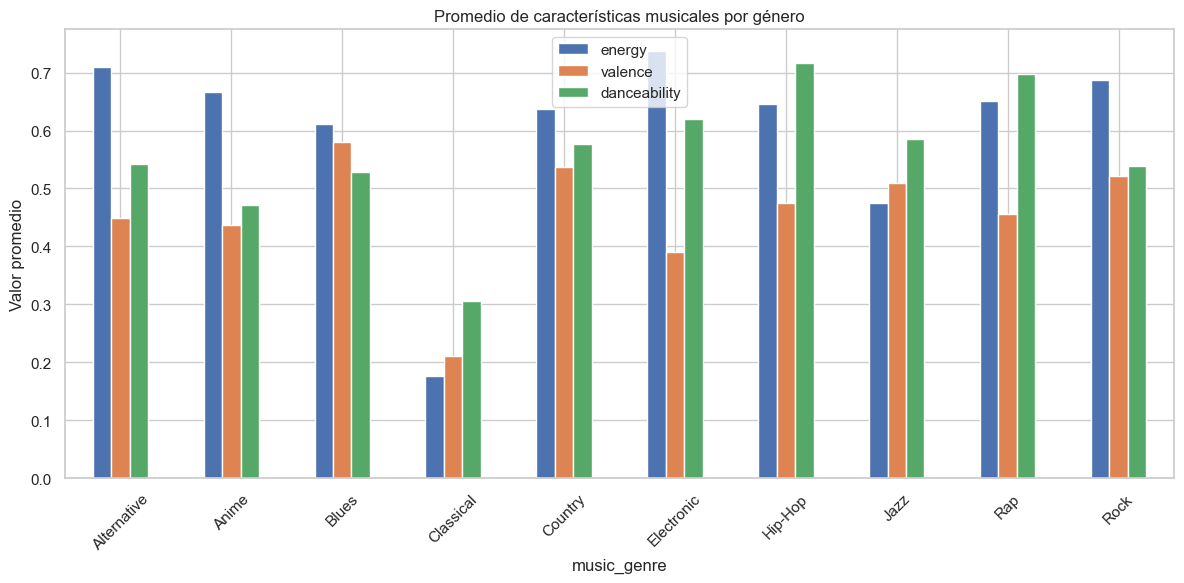

In [14]:
mean_features = df.groupby('music_genre')[['energy', 'valence', 'danceability']].mean()

mean_features.plot(kind='bar', figsize=(12, 6))
plt.title("Promedio de características musicales por género")
plt.ylabel("Valor promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
